# import lib

In [25]:
import tensorflow as tf

import tensorflow.keras as keras

from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline



np.random.seed(7)

import pixiedust
print(tf.__version__)


1.13.1


# load data

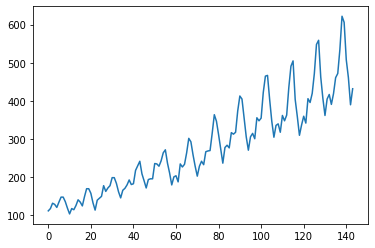

In [26]:

#data set from url below
TRAIN_URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
# path_file = tf.keras.utils.get_file(data_url)

#keras util 参看https://www.jianshu.com/p/9c87a961b720
train_path = tf.keras.utils.get_file(fname=TRAIN_URL.split('/')[-1],
                                         origin=TRAIN_URL)
dataframe = pd.read_csv(train_path, usecols=[1])

dataframe.head(10)


dataset = dataframe.values
# 将整型变为float
dataset = dataset.astype('float32')


plt.plot(dataset)


# plt.plot(data_csv_values)

In [27]:
#data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# process data

In [28]:
#dataset shape = (all_sample_num,1)
#
def create_seq_data(dataset, steps = 1):
    sub_sample_num = len(dataset) - steps - 1 #-1表示序号i 从0开始，而不是从1开始
    dataX= []
    dataY = []
    for i in range(sub_sample_num):
        dataset_x = dataset[i:(i + steps), 0]
        dataset_y = dataset[i + steps, 0]
        dataX.append(dataset_x)
        dataY.append(dataset_y)
    return np.array(dataX), np.array(dataY)
        

#return (x, y)
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size

#dataset shape(all_sample_num, 1)
dataset_train_origin = dataset[0:train_size,:]
dataset_test_origin = dataset[train_size : len(dataset), :]

time_step = 2

#shape(train_size, time_step)
trainX, trainY = create_seq_data(dataset_train_origin, steps = time_step) 
#reshape(train_size, time_step, features = 1)
# trainX = tf.reshape(trainX, [trainX.shape[0], 1, trainX.shape[1]]) #return Tensor
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1])) #return numpy narray

testX, testY = create_seq_data(dataset_test_origin, steps = time_step)

# testX = tf.reshape(testX, [testX.shape[0], 1, testX.shape[1]])                    
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# dataset_train = create_seq_data(dataset_train_origin, steps = time_step)
# trainX_tuple, trainY_tuple = zip(*dataset_train)
# trainX, trainY = list(trainX_tuple), list(trainY_tuple)


# dataset_test = create_seq_data(dataset_test_origin, steps = time_step)
# testX_tuple, testY_tuple = zip(*dataset_test)
# testX, testY = list(testX_tuple), list(testY_tuple)



#print x,y
# for (x, y) in dataset_seq:
#     print(x, "----")
#     print(y)

        

# define model

In [29]:
batch_size = 1
epochs = 100
model = keras.Sequential()
model.add(keras.layers.LSTM(4, input_shape=(batch_size, time_step)))
model.add(keras.layers.Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mean_absolute_error'])

model.summary()
# model.compile()

# model.compile(optimizer='adam', )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


# train model

In [30]:
# %%pixie_debugger
history = model.fit(trainX, trainY, epochs=100, validation_split = 0.2, batch_size=1, verbose=1, steps_per_epoch=50)


Epoch 1/100
50/50 [==============================] - 1s 16ms/step - loss: 0.0286 - mean_absolute_error: 0.1368 - val_loss: 0.1065 - val_mean_absolute_error: 0.3163
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0128 - mean_absolute_error: 0.0876 - val_loss: 0.0634 - val_mean_absolute_error: 0.2395
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0084 - mean_absolute_error: 0.0730 - val_loss: 0.0448 - val_mean_absolute_error: 0.1977
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0074 - mean_absolute_error: 0.0697 - val_loss: 0.0374 - val_mean_absolute_error: 0.1786
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0068 - mean_absolute_error: 0.0669 - val_loss: 0.0326 - val_mean_absolute_error: 0.1655
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0062 - mean_absolute_error: 0.0636 - val_loss: 0.0281 - val_mean_absolute_error: 0.1518
Epoch 7/100
50/50 [==

50/50 [==============================] - 0s 3ms/step - loss: 0.0015 - mean_absolute_error: 0.0310 - val_loss: 0.0049 - val_mean_absolute_error: 0.0603
Epoch 52/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_absolute_error: 0.0310 - val_loss: 0.0048 - val_mean_absolute_error: 0.0600
Epoch 53/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0015 - mean_absolute_error: 0.0309 - val_loss: 0.0048 - val_mean_absolute_error: 0.0597
Epoch 54/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0015 - mean_absolute_error: 0.0309 - val_loss: 0.0048 - val_mean_absolute_error: 0.0595
Epoch 55/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0015 - mean_absolute_error: 0.0309 - val_loss: 0.0047 - val_mean_absolute_error: 0.0594
Epoch 56/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0014 - mean_absolute_error: 0.0309 - val_loss: 0.0047 - val_mean_absolute_error: 0.0592
Epoch 57/100
50/50 [=========

In [31]:

history_history = history.history
print("keys=", history_history.keys())

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

keys= dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


,loss,mean_absolute_error,val_loss,val_mean_absolute_error,epoch
95,0.001401,0.030848,0.003629,0.049910,95
96,0.001400,0.030841,0.003610,0.049552,96
97,0.001399,0.030834,0.003592,0.049188,97
98,0.001398,0.030827,0.003575,0.048819,98
99,0.001397,0.030819,0.003559,0.048453,99


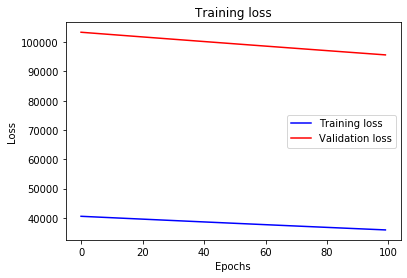

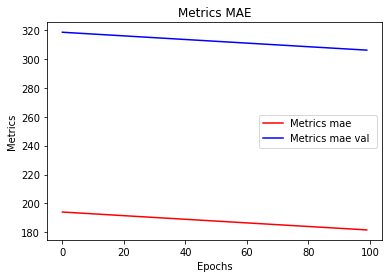

In [15]:
# please refer to https://www.tensorflow.org/tutorials/keras/basic_regression#normalize_the_data 
#if you want more info about history
def print_history(history):
    mean_absolute_error = history.history['mean_absolute_error']
    val_mean_absolute_error = history.history['val_mean_absolute_error']
    loss = history.history['loss']
    epochs = history.epoch
    val_loss = history.history['val_loss']

#     epochs = range(1, len(mean_absolute_error) + 1)

    # "bo" is for "blue dot"
    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')

    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, mean_absolute_error, 'r', label="Metrics mae")
    plt.plot(epochs, val_mean_absolute_error, 'b', label="Metrics mae val ")
    plt.title('Metrics MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    
    plt.legend()
    plt.show()
    
print_history(history)

In [32]:
loss_value, metrics_value = model.evaluate(testX, testY)
print(metrics_value)

41/41 [==============================] - 0s 179us/sample - loss: 0.0074 - mean_absolute_error: 0.0701
0.07013457


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


[125.33026] [131.99999879 129.00000163 120.99999632 135.00000368 147.99999397
 147.99999397 136.00000531 119.00000078 103.99999952 117.99999916
 115.00000199 125.99999674 140.99999801 135.00000368 125.00000283
 148.9999956  169.99999891 169.99999891 157.99999481 133.00000042
 114.00000036 139.99999638 145.00000452 149.99999723 177.9999965
 163.00000295 172.00000217 177.9999965  198.99999982 198.99999982
 184.00000627 162.00000133 146.00000615 165.9999924  171.00000054
 179.99999976 193.00000549 181.00000139 183.00000464 217.99999988
 230.00000398 241.99999264 209.00000066 191.00000223 172.00000217
 194.00000712 195.99999493 195.99999493 235.99999831 234.99999668
 229.00000235 242.99999427 263.99999759 272.00001061 236.99999994
 211.00000392 179.99999976 201.00000308 203.99999252 187.99999735
 234.99999668 226.9999991  233.99999506 263.99999759 301.99999771
 292.99999849 259.00000488 229.00000235 203.00000633 229.00000235
 241.99999264 232.99999343 266.99998703 268.99999029 270.00000736

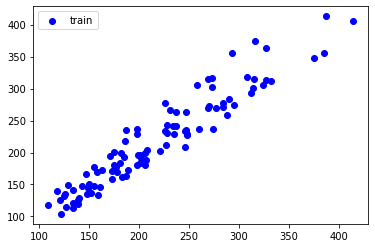

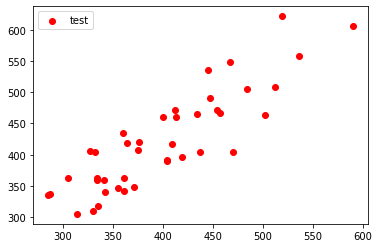

In [43]:
# %%pixie_debugger
def print_predcit(scaled_x, scaled_y, color, label):
    y_predict = scaler.inverse_transform(model.predict(scaled_x))
    y_label = scaler.inverse_transform([scaled_y])
    
    plt.figure()
    plt.scatter(y_predict, y_label, c=color, label=label)
    plt.legend()
    
    for y_p, y_l in zip(y_predict, y_label):
        print(y_p, y_l)
#         yield(y_p, y_l)
    

print_predcit(trainX, trainY, "b", "train")
# print(result_train)
print_predcit(testX, testY, "r", "test")
# print(result_test)
# print_predcit(testX, testY, "r", "test")
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])

# print("testY:", testY)
# testY_predicts = model.predict(testX)
# print("testY_predicts:", testY_predicts)
# plt.figure()
# plt.scatter(testY, testY_predicts)